# Machine Learning - PreProcessing
# This notebook prepares the data for an artificial recurrent neural network called Long Short Term Memory (LSTM) using the past 60 days stock price of (Apple Inc)

In [1]:
# Initial imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get the stock data using yahoo source
df_AAPL = web.DataReader(['AAPL'], data_source='yahoo', start='2016-01-01', end='2021-01-15')
df_AAPL

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2016-01-04,24.400942,26.337500,26.342501,25.500000,25.652500,270597600.0
2016-01-05,23.789471,25.677500,26.462500,25.602501,26.437500,223164000.0
2016-01-06,23.323915,25.174999,25.592501,24.967501,25.139999,273829600.0
2016-01-07,22.339539,24.112499,25.032499,24.107500,24.670000,324377600.0
2016-01-08,22.457672,24.240000,24.777500,24.190001,24.637501,283192000.0
...,...,...,...,...,...,...
2021-01-11,128.979996,128.979996,130.169998,128.500000,129.190002,100620900.0
2021-01-12,128.800003,128.800003,129.690002,126.860001,128.500000,91951100.0


In [3]:
#df_AAPL.to_csv(index=False)

In [4]:
#compression_opts = dict(method='zip',
#                        archive_name='out2.csv')  
#df_AAPL.to_csv('out.zip', index=False,
#          compression=compression_opts)

<function matplotlib.pyplot.show(*args, **kw)>

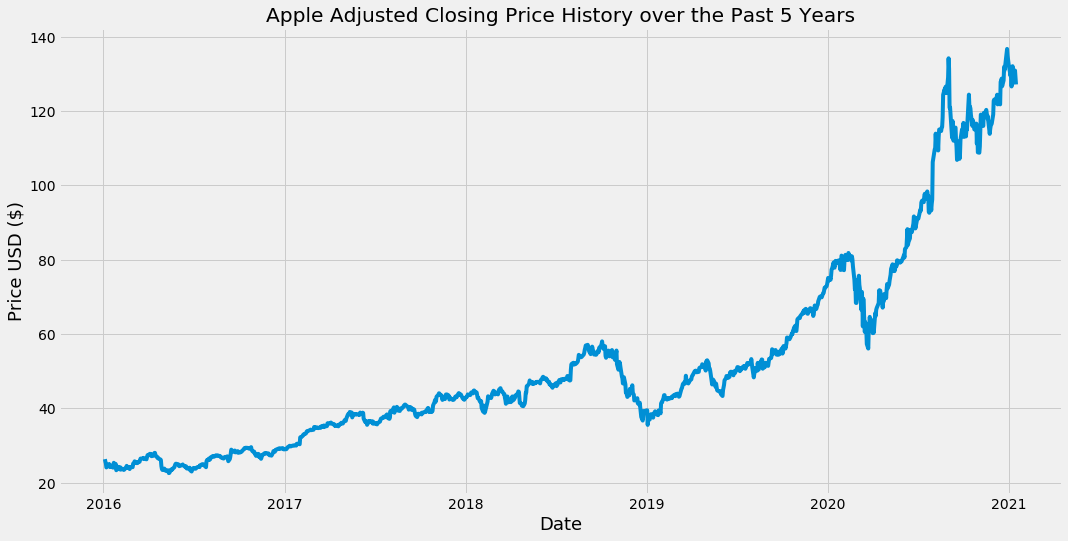

In [5]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Apple Adjusted Closing Price History over the Past 5 Years')
plt.plot(df_AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.show

In [14]:
AAPL_Close_df = pd.read_csv('..//Resources/AAPL_Closing.csv')
# Reset the date as the index
AAPL_Close_df = AAPL_Close_df.set_index(pd.DatetimeIndex(AAPL_Close_df['Date'].values))
#Remove the Date column
#AAPL_Close_df.drop(columns=['Date'], axis=1, inplace=True)
AAPL_Close_df

,Date,Adj_Close,Close,High,Low,Open,Volume
2016-01-04,1/4/16,24.40,26.34,26.34,25.50,25.65,270597600.0
2016-01-05,1/5/16,23.79,25.68,26.46,25.60,26.44,223164000.0
2016-01-06,1/6/16,23.32,25.17,25.59,24.97,25.14,273829600.0
2016-01-07,1/7/16,22.34,24.11,25.03,24.11,24.67,324377600.0
2016-01-08,1/8/16,22.46,24.24,24.78,24.19,24.64,283192000.0
...,...,...,...,...,...,...,...
2021-01-11,1/11/21,128.98,128.98,130.17,128.50,129.19,100620900.0
2021-01-12,1/12/21,128.80,128.80,129.69,126.86,128.50,91951100.0
2021-01-13,1/13/21,130.89,130.89,131.45,128.49,128.76,88636800.0
2021-01-14,1/14/21,128.91,128.91,131.00,128.76,130.80,90221800.0


In [15]:
AAPL_Close_df.shape

(1269, 7)

In [17]:
# Create a new dataframe with only the 'Close Column'
data = AAPL_Close_df['Date']['Close']

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

KeyError: 'Close'

In [13]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

ValueError: Expected 2D array, got 1D array instead:
array=[ 26.34  25.68  25.17 ... 130.89 128.91 127.14].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.